# Postcode dataset creation

### Process Flow :

1. load file from Internet and create pickle snapshot in case dataset site off-line 
2. save postcode data in out-code and in-code formats
3. enrich dataset wth coord tuple
4. save enriched postcode data for downstream use
5. reload preprocessed data and check details

### Input data

Postcode file(s): from  https://www.freemaptools.com   

### Output data

* 'Postcodes-in.pickle': snapshot of Postcodes 'in-code' data
* 'Postcodes-out.pickle': **Postcodes dataset**
* saved data assessment plot (.png) snapshots

## Import external libraries

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 'Import' RTAutilities

In [2]:
'''
Provide output of csv and pickle formats for DataFrames
'''
def pick_and_csv(df, path, filename):
    import sys
    try:
        df.to_csv(path + filename + '.csv', index=False)
        df.to_pickle(path + filename + '.pickle')
    except IOError as (errno, strerror):
        print ('I/O error({0}): {1}'.format(errno, strerror))
        if errno == 13:
            print ('*** check to see if (someone has) file already open ***')
        elif errno == 2:
            print ('Directory parameter needs to be a valid directory')
    except:
        print ("Unexpected error:", sys.exc_info()[0])
        print ('*** is first parameter a DataFrame? ***')
        raise

## Load Postcode data and create dataset

In [3]:
'''
Load and save postcode data in two formats:

inc. in-codes: e.g. 'AB10 1XG'
Outcodes only: e.g. 'AB10'

need to download Vehicle file to local Data diectory
'''
start_time0 = time.time()

#load from url
url='https://www.freemaptools.com/download/full-postcodes/ukpostcodes.zip'
Postcodes_in = pd.read_csv(url, compression='zip', sep=',', quotechar='"', engine = 'python')

#Save Postcodes_in format data as a csv and pickle file
_ = pick_and_csv(Postcodes_in, 'Data/', 'Postcodes_in')

#load from url
url='https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv'
Postcodes_out = pd.read_csv(url)

#Save Postcodes_out format data as a csv and pickle file
_ = pick_and_csv(Postcodes_out, 'Data/', 'Postcodes_out')

print ("Postcode dataset load from website: %s seconds " % (time.time() - start_time0))

Postcode dataset load from website: 41.881000042 seconds 


In [4]:
'''
Load and enrich postcode data with postcode Area and coord tuple
'''
Postcodes = pd.read_pickle('Data/Postcodes_out.pickle')
Postcodes['Post_coord'] = zip(Postcodes['latitude'], Postcodes['longitude'])
Postcodes['Areas'] = Postcodes['postcode'].str.extract(r'(\D+)')
Postcodes.to_pickle('Data/Postcodes.pickle')

C:\Users\Iain\Anaconda3\envs\GA\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


## Data assessment

In [5]:
'''
Reload RTA Postcodes dataframe to check properly saved and reloadable
'''
Postcodes = pd.read_pickle('Data/Postcodes.pickle')

In [6]:
Postcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 6 columns):
id            3003 non-null int64
postcode      3003 non-null object
latitude      3003 non-null float64
longitude     3003 non-null float64
Post_coord    3003 non-null object
Areas         3003 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 140.8+ KB


In [7]:
Postcodes.head(2)

,id,postcode,latitude,longitude,Post_coord,Areas
0,2,AB10,57.13514,-2.11731,"(57.13514, -2.11731)",AB
1,3,AB11,57.13875,-2.09089,"(57.13875, -2.09089)",AB


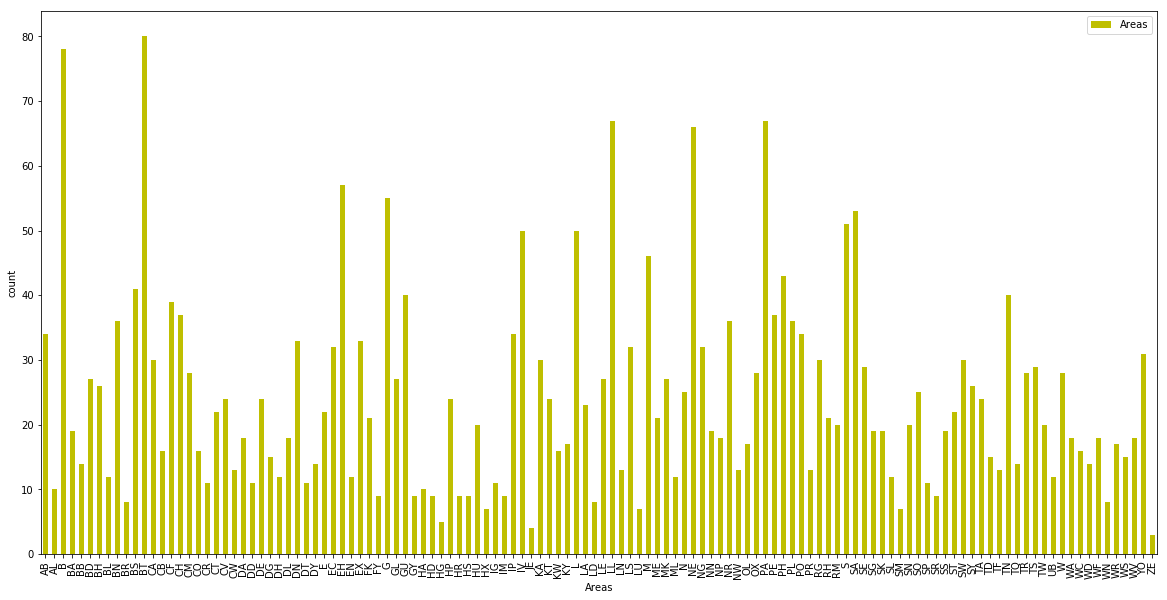

In [8]:
'''
RTA Postcodes check data fields
'''
# check data
col = 'Areas'

plt.figure(figsize=(20,10))
Postcodes.groupby([col])[col].count().plot(kind='bar',color='y',legend=True)
plt.ylabel('count')
plt.savefig('Data/Pics/postcode_Bar_'+col+'.png')
plt.show()